## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906


0:	learn: 0.9740469	total: 52.4ms	remaining: 52.3s
1:	learn: 0.9416099	total: 53.4ms	remaining: 26.6s
2:	learn: 0.9140742	total: 53.9ms	remaining: 17.9s
3:	learn: 0.8830540	total: 54.2ms	remaining: 13.5s
4:	learn: 0.8580488	total: 54.3ms	remaining: 10.8s
5:	learn: 0.8302383	total: 54.6ms	remaining: 9.05s
6:	learn: 0.8075403	total: 54.8ms	remaining: 7.77s
7:	learn: 0.7824986	total: 55ms	remaining: 6.83s
8:	learn: 0.7562629	total: 56.1ms	remaining: 6.18s
9:	learn: 0.7347046	total: 56.7ms	remaining: 5.61s
10:	learn: 0.7115440	total: 57.2ms	remaining: 5.14s
11:	learn: 0.6896500	total: 57.6ms	remaining: 4.74s
12:	learn: 0.6671692	total: 57.9ms	remaining: 4.4s
13:	learn: 0.6462847	total: 58.5ms	remaining: 4.12s
14:	learn: 0.6259770	total: 58.9ms	remaining: 3.86s
15:	learn: 0.6055359	total: 59.4ms	remaining: 3.65s
16:	learn: 0.5876957	total: 59.9ms	remaining: 3.47s
17:	learn: 0.5703578	total: 64.5ms	remaining: 3.52s
18:	learn: 0.5529417	total: 65.6ms	remaining: 3.39s
19:	learn: 0.5369309	tota

103:	learn: 0.0755575	total: 131ms	remaining: 1.13s
104:	learn: 0.0747956	total: 132ms	remaining: 1.12s
105:	learn: 0.0741461	total: 132ms	remaining: 1.11s
106:	learn: 0.0730056	total: 133ms	remaining: 1.11s
107:	learn: 0.0720344	total: 134ms	remaining: 1.1s
108:	learn: 0.0709468	total: 134ms	remaining: 1.1s
109:	learn: 0.0704851	total: 135ms	remaining: 1.09s
110:	learn: 0.0692974	total: 135ms	remaining: 1.08s
111:	learn: 0.0685003	total: 139ms	remaining: 1.1s
112:	learn: 0.0676309	total: 139ms	remaining: 1.09s
113:	learn: 0.0670526	total: 140ms	remaining: 1.09s
114:	learn: 0.0660849	total: 141ms	remaining: 1.08s
115:	learn: 0.0653621	total: 141ms	remaining: 1.08s
116:	learn: 0.0645979	total: 142ms	remaining: 1.07s
117:	learn: 0.0637082	total: 143ms	remaining: 1.07s
118:	learn: 0.0630435	total: 143ms	remaining: 1.06s
119:	learn: 0.0621494	total: 144ms	remaining: 1.05s
120:	learn: 0.0615014	total: 145ms	remaining: 1.05s
121:	learn: 0.0608151	total: 145ms	remaining: 1.05s
122:	learn: 0.0

147:	learn: 0.0495205	total: 162ms	remaining: 934ms
148:	learn: 0.0492176	total: 163ms	remaining: 930ms
149:	learn: 0.0489275	total: 163ms	remaining: 926ms
150:	learn: 0.0488310	total: 164ms	remaining: 921ms
151:	learn: 0.0486268	total: 164ms	remaining: 916ms
152:	learn: 0.0483761	total: 164ms	remaining: 910ms
153:	learn: 0.0481108	total: 165ms	remaining: 905ms
154:	learn: 0.0479423	total: 167ms	remaining: 909ms
155:	learn: 0.0477059	total: 168ms	remaining: 908ms
156:	learn: 0.0474885	total: 168ms	remaining: 903ms
157:	learn: 0.0472905	total: 170ms	remaining: 907ms
158:	learn: 0.0470961	total: 171ms	remaining: 903ms
159:	learn: 0.0468616	total: 171ms	remaining: 899ms
160:	learn: 0.0466357	total: 177ms	remaining: 923ms
161:	learn: 0.0464755	total: 178ms	remaining: 921ms
162:	learn: 0.0462764	total: 179ms	remaining: 917ms
163:	learn: 0.0460657	total: 181ms	remaining: 925ms
164:	learn: 0.0459022	total: 182ms	remaining: 922ms
165:	learn: 0.0457279	total: 183ms	remaining: 920ms
166:	learn: 

212:	learn: 0.0376050	total: 263ms	remaining: 970ms
213:	learn: 0.0375060	total: 264ms	remaining: 968ms
214:	learn: 0.0374191	total: 265ms	remaining: 969ms
215:	learn: 0.0372925	total: 266ms	remaining: 967ms
216:	learn: 0.0370692	total: 267ms	remaining: 963ms
217:	learn: 0.0369441	total: 268ms	remaining: 960ms
218:	learn: 0.0367767	total: 269ms	remaining: 959ms
219:	learn: 0.0366302	total: 270ms	remaining: 958ms
220:	learn: 0.0365508	total: 271ms	remaining: 956ms
221:	learn: 0.0364408	total: 273ms	remaining: 955ms
222:	learn: 0.0363262	total: 273ms	remaining: 952ms
223:	learn: 0.0362572	total: 275ms	remaining: 954ms
224:	learn: 0.0360902	total: 276ms	remaining: 952ms
225:	learn: 0.0360208	total: 278ms	remaining: 951ms
226:	learn: 0.0358470	total: 279ms	remaining: 948ms
227:	learn: 0.0357549	total: 279ms	remaining: 944ms
228:	learn: 0.0356504	total: 280ms	remaining: 942ms
229:	learn: 0.0355279	total: 281ms	remaining: 940ms
230:	learn: 0.0354268	total: 282ms	remaining: 940ms
231:	learn: 

236:	learn: 0.0347034	total: 298ms	remaining: 960ms
237:	learn: 0.0345632	total: 304ms	remaining: 974ms
238:	learn: 0.0344626	total: 306ms	remaining: 973ms
239:	learn: 0.0343655	total: 309ms	remaining: 978ms
240:	learn: 0.0341890	total: 318ms	remaining: 1s
241:	learn: 0.0340919	total: 323ms	remaining: 1.01s
242:	learn: 0.0339272	total: 325ms	remaining: 1.01s
243:	learn: 0.0338103	total: 327ms	remaining: 1.01s
244:	learn: 0.0336965	total: 330ms	remaining: 1.02s
245:	learn: 0.0336016	total: 332ms	remaining: 1.02s
246:	learn: 0.0335045	total: 334ms	remaining: 1.02s
247:	learn: 0.0333912	total: 336ms	remaining: 1.02s
248:	learn: 0.0333023	total: 336ms	remaining: 1.01s
249:	learn: 0.0332224	total: 338ms	remaining: 1.01s
250:	learn: 0.0331405	total: 339ms	remaining: 1.01s
251:	learn: 0.0329523	total: 340ms	remaining: 1.01s
252:	learn: 0.0328126	total: 342ms	remaining: 1.01s
253:	learn: 0.0327617	total: 342ms	remaining: 1s
254:	learn: 0.0325857	total: 343ms	remaining: 1s
255:	learn: 0.0324899

290:	learn: 0.0296903	total: 404ms	remaining: 983ms
291:	learn: 0.0296548	total: 408ms	remaining: 988ms
292:	learn: 0.0296272	total: 408ms	remaining: 984ms
293:	learn: 0.0295619	total: 409ms	remaining: 981ms
294:	learn: 0.0295068	total: 410ms	remaining: 979ms
295:	learn: 0.0294732	total: 411ms	remaining: 977ms
296:	learn: 0.0293925	total: 412ms	remaining: 975ms
297:	learn: 0.0292486	total: 414ms	remaining: 974ms
298:	learn: 0.0291902	total: 415ms	remaining: 974ms
299:	learn: 0.0290539	total: 416ms	remaining: 970ms
300:	learn: 0.0290125	total: 418ms	remaining: 972ms
301:	learn: 0.0289414	total: 419ms	remaining: 968ms
302:	learn: 0.0288235	total: 419ms	remaining: 965ms
303:	learn: 0.0287852	total: 420ms	remaining: 961ms
304:	learn: 0.0287300	total: 420ms	remaining: 958ms
305:	learn: 0.0286809	total: 421ms	remaining: 955ms
306:	learn: 0.0286345	total: 422ms	remaining: 954ms
307:	learn: 0.0285797	total: 423ms	remaining: 950ms
308:	learn: 0.0285145	total: 423ms	remaining: 947ms
309:	learn: 

319:	learn: 0.0277819	total: 438ms	remaining: 930ms
320:	learn: 0.0277373	total: 439ms	remaining: 928ms
321:	learn: 0.0276952	total: 443ms	remaining: 934ms
322:	learn: 0.0276139	total: 446ms	remaining: 934ms
323:	learn: 0.0275551	total: 447ms	remaining: 932ms
324:	learn: 0.0274550	total: 448ms	remaining: 930ms
325:	learn: 0.0273713	total: 451ms	remaining: 931ms
326:	learn: 0.0272511	total: 451ms	remaining: 929ms
327:	learn: 0.0271736	total: 452ms	remaining: 926ms
328:	learn: 0.0271094	total: 457ms	remaining: 932ms
329:	learn: 0.0270128	total: 458ms	remaining: 929ms
330:	learn: 0.0269680	total: 458ms	remaining: 926ms
331:	learn: 0.0269154	total: 461ms	remaining: 927ms
332:	learn: 0.0268243	total: 462ms	remaining: 925ms
333:	learn: 0.0267882	total: 467ms	remaining: 932ms
334:	learn: 0.0267461	total: 468ms	remaining: 929ms
335:	learn: 0.0267263	total: 469ms	remaining: 926ms
336:	learn: 0.0266695	total: 469ms	remaining: 923ms
337:	learn: 0.0266286	total: 469ms	remaining: 919ms
338:	learn: 

414:	learn: 0.0228261	total: 545ms	remaining: 768ms
415:	learn: 0.0227950	total: 545ms	remaining: 765ms
416:	learn: 0.0227695	total: 546ms	remaining: 763ms
417:	learn: 0.0227505	total: 546ms	remaining: 760ms
418:	learn: 0.0227253	total: 547ms	remaining: 758ms
419:	learn: 0.0226990	total: 547ms	remaining: 756ms
420:	learn: 0.0226684	total: 548ms	remaining: 754ms
421:	learn: 0.0226257	total: 548ms	remaining: 751ms
422:	learn: 0.0225703	total: 549ms	remaining: 749ms
423:	learn: 0.0225322	total: 549ms	remaining: 746ms
424:	learn: 0.0224979	total: 550ms	remaining: 744ms
425:	learn: 0.0224585	total: 550ms	remaining: 741ms
426:	learn: 0.0224115	total: 551ms	remaining: 739ms
427:	learn: 0.0223897	total: 551ms	remaining: 737ms
428:	learn: 0.0223457	total: 552ms	remaining: 734ms
429:	learn: 0.0223119	total: 552ms	remaining: 732ms
430:	learn: 0.0222779	total: 552ms	remaining: 729ms
431:	learn: 0.0222502	total: 553ms	remaining: 727ms
432:	learn: 0.0222223	total: 553ms	remaining: 725ms
433:	learn: 

450:	learn: 0.0215788	total: 575ms	remaining: 700ms
451:	learn: 0.0215532	total: 579ms	remaining: 701ms
452:	learn: 0.0215100	total: 579ms	remaining: 699ms
453:	learn: 0.0214457	total: 585ms	remaining: 703ms
454:	learn: 0.0214174	total: 585ms	remaining: 701ms
455:	learn: 0.0213693	total: 586ms	remaining: 699ms
456:	learn: 0.0213148	total: 586ms	remaining: 696ms
457:	learn: 0.0212942	total: 587ms	remaining: 694ms
458:	learn: 0.0212677	total: 587ms	remaining: 692ms
459:	learn: 0.0212508	total: 587ms	remaining: 689ms
460:	learn: 0.0212225	total: 587ms	remaining: 687ms
461:	learn: 0.0211835	total: 588ms	remaining: 684ms
462:	learn: 0.0211110	total: 588ms	remaining: 682ms
463:	learn: 0.0210521	total: 589ms	remaining: 680ms
464:	learn: 0.0210346	total: 589ms	remaining: 678ms
465:	learn: 0.0209886	total: 590ms	remaining: 676ms
466:	learn: 0.0209669	total: 590ms	remaining: 673ms
467:	learn: 0.0209454	total: 590ms	remaining: 671ms
468:	learn: 0.0209166	total: 592ms	remaining: 670ms
469:	learn: 

576:	learn: 0.0181034	total: 681ms	remaining: 500ms
577:	learn: 0.0180787	total: 682ms	remaining: 498ms
578:	learn: 0.0180509	total: 682ms	remaining: 496ms
579:	learn: 0.0180169	total: 683ms	remaining: 495ms
580:	learn: 0.0180022	total: 687ms	remaining: 496ms
581:	learn: 0.0179853	total: 688ms	remaining: 494ms
582:	learn: 0.0179711	total: 688ms	remaining: 492ms
583:	learn: 0.0179505	total: 698ms	remaining: 498ms
584:	learn: 0.0179289	total: 699ms	remaining: 496ms
585:	learn: 0.0179125	total: 699ms	remaining: 494ms
586:	learn: 0.0178854	total: 700ms	remaining: 492ms
587:	learn: 0.0178529	total: 700ms	remaining: 491ms
588:	learn: 0.0178397	total: 701ms	remaining: 489ms
589:	learn: 0.0178268	total: 701ms	remaining: 487ms
590:	learn: 0.0177953	total: 702ms	remaining: 486ms
591:	learn: 0.0177592	total: 702ms	remaining: 484ms
592:	learn: 0.0177388	total: 703ms	remaining: 482ms
593:	learn: 0.0177053	total: 703ms	remaining: 481ms
594:	learn: 0.0176905	total: 704ms	remaining: 479ms
595:	learn: 

600:	learn: 0.0175714	total: 716ms	remaining: 475ms
601:	learn: 0.0175588	total: 722ms	remaining: 477ms
602:	learn: 0.0175319	total: 723ms	remaining: 476ms
603:	learn: 0.0175165	total: 726ms	remaining: 476ms
604:	learn: 0.0175067	total: 727ms	remaining: 474ms
605:	learn: 0.0174970	total: 727ms	remaining: 473ms
606:	learn: 0.0174887	total: 727ms	remaining: 471ms
607:	learn: 0.0174730	total: 728ms	remaining: 469ms
608:	learn: 0.0174502	total: 728ms	remaining: 468ms
609:	learn: 0.0174317	total: 729ms	remaining: 466ms
610:	learn: 0.0174066	total: 729ms	remaining: 464ms
611:	learn: 0.0173758	total: 730ms	remaining: 463ms
612:	learn: 0.0173478	total: 730ms	remaining: 461ms
613:	learn: 0.0173251	total: 731ms	remaining: 460ms
614:	learn: 0.0173067	total: 731ms	remaining: 458ms
615:	learn: 0.0172874	total: 732ms	remaining: 456ms
616:	learn: 0.0172576	total: 732ms	remaining: 455ms
617:	learn: 0.0172213	total: 733ms	remaining: 453ms
618:	learn: 0.0172041	total: 733ms	remaining: 451ms
619:	learn: 

689:	learn: 0.0160574	total: 805ms	remaining: 362ms
690:	learn: 0.0160330	total: 805ms	remaining: 360ms
691:	learn: 0.0160183	total: 806ms	remaining: 359ms
692:	learn: 0.0159954	total: 809ms	remaining: 358ms
693:	learn: 0.0159850	total: 809ms	remaining: 357ms
694:	learn: 0.0159661	total: 810ms	remaining: 355ms
695:	learn: 0.0159456	total: 811ms	remaining: 354ms
696:	learn: 0.0158990	total: 811ms	remaining: 353ms
697:	learn: 0.0158925	total: 811ms	remaining: 351ms
698:	learn: 0.0158640	total: 817ms	remaining: 352ms
699:	learn: 0.0158456	total: 817ms	remaining: 350ms
700:	learn: 0.0158281	total: 822ms	remaining: 351ms
701:	learn: 0.0158138	total: 823ms	remaining: 349ms
702:	learn: 0.0158060	total: 823ms	remaining: 348ms
703:	learn: 0.0158015	total: 824ms	remaining: 346ms
704:	learn: 0.0157830	total: 824ms	remaining: 345ms
705:	learn: 0.0157618	total: 825ms	remaining: 343ms
706:	learn: 0.0157327	total: 825ms	remaining: 342ms
707:	learn: 0.0157229	total: 826ms	remaining: 341ms
708:	learn: 

732:	learn: 0.0153543	total: 846ms	remaining: 308ms
733:	learn: 0.0153429	total: 846ms	remaining: 307ms
734:	learn: 0.0153192	total: 847ms	remaining: 305ms
735:	learn: 0.0153167	total: 847ms	remaining: 304ms
736:	learn: 0.0153077	total: 852ms	remaining: 304ms
737:	learn: 0.0152879	total: 852ms	remaining: 303ms
738:	learn: 0.0152627	total: 853ms	remaining: 301ms
739:	learn: 0.0152506	total: 853ms	remaining: 300ms
740:	learn: 0.0152370	total: 854ms	remaining: 298ms
741:	learn: 0.0152105	total: 855ms	remaining: 297ms
742:	learn: 0.0151952	total: 855ms	remaining: 296ms
743:	learn: 0.0151789	total: 856ms	remaining: 294ms
744:	learn: 0.0151695	total: 856ms	remaining: 293ms
745:	learn: 0.0151471	total: 857ms	remaining: 292ms
746:	learn: 0.0151393	total: 857ms	remaining: 290ms
747:	learn: 0.0151307	total: 858ms	remaining: 289ms
748:	learn: 0.0151189	total: 858ms	remaining: 288ms
749:	learn: 0.0151063	total: 859ms	remaining: 286ms
750:	learn: 0.0150911	total: 859ms	remaining: 285ms
751:	learn: 

867:	learn: 0.0136061	total: 949ms	remaining: 144ms
868:	learn: 0.0135971	total: 950ms	remaining: 143ms
869:	learn: 0.0135889	total: 950ms	remaining: 142ms
870:	learn: 0.0135854	total: 962ms	remaining: 142ms
871:	learn: 0.0135686	total: 962ms	remaining: 141ms
872:	learn: 0.0135638	total: 963ms	remaining: 140ms
873:	learn: 0.0135530	total: 964ms	remaining: 139ms
874:	learn: 0.0135514	total: 964ms	remaining: 138ms
875:	learn: 0.0135463	total: 965ms	remaining: 137ms
876:	learn: 0.0135408	total: 965ms	remaining: 135ms
877:	learn: 0.0135297	total: 966ms	remaining: 134ms
878:	learn: 0.0134959	total: 966ms	remaining: 133ms
879:	learn: 0.0134792	total: 967ms	remaining: 132ms
880:	learn: 0.0134723	total: 967ms	remaining: 131ms
881:	learn: 0.0134620	total: 973ms	remaining: 130ms
882:	learn: 0.0134562	total: 974ms	remaining: 129ms
883:	learn: 0.0134434	total: 974ms	remaining: 128ms
884:	learn: 0.0134250	total: 975ms	remaining: 127ms
885:	learn: 0.0134150	total: 975ms	remaining: 125ms
886:	learn: 

899:	learn: 0.0132776	total: 1.01s	remaining: 112ms
900:	learn: 0.0132722	total: 1.01s	remaining: 111ms
901:	learn: 0.0132673	total: 1.01s	remaining: 110ms
902:	learn: 0.0132609	total: 1.01s	remaining: 108ms
903:	learn: 0.0132545	total: 1.01s	remaining: 107ms
904:	learn: 0.0132465	total: 1.01s	remaining: 106ms
905:	learn: 0.0132383	total: 1.01s	remaining: 105ms
906:	learn: 0.0132307	total: 1.01s	remaining: 104ms
907:	learn: 0.0132133	total: 1.01s	remaining: 103ms
908:	learn: 0.0132031	total: 1.01s	remaining: 102ms
909:	learn: 0.0131982	total: 1.01s	remaining: 100ms
910:	learn: 0.0131921	total: 1.01s	remaining: 99.3ms
911:	learn: 0.0131738	total: 1.02s	remaining: 98.1ms
912:	learn: 0.0131677	total: 1.02s	remaining: 96.9ms
913:	learn: 0.0131592	total: 1.02s	remaining: 95.7ms
914:	learn: 0.0131468	total: 1.02s	remaining: 94.9ms
915:	learn: 0.0131423	total: 1.02s	remaining: 93.7ms
916:	learn: 0.0131342	total: 1.02s	remaining: 92.5ms
917:	learn: 0.0131189	total: 1.02s	remaining: 91.4ms
918:

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.024114840357076794
ABC Pre-generator MAE 0.08220023449178471


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

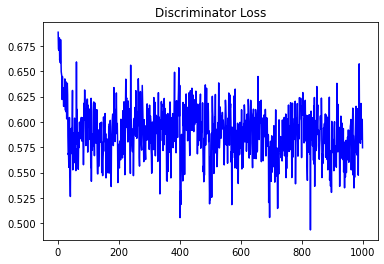

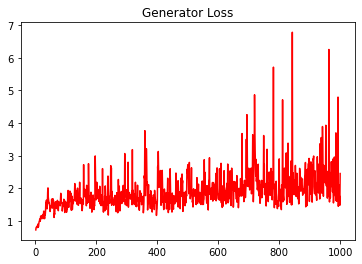

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.06953435943982043


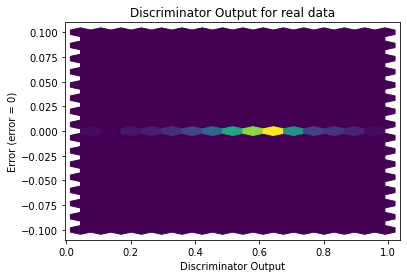

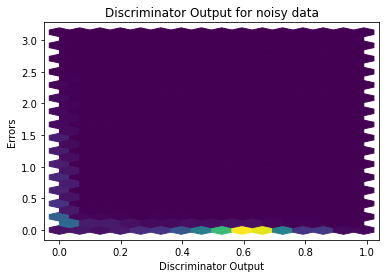

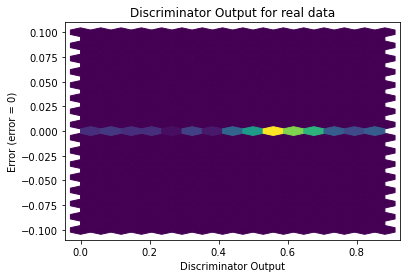

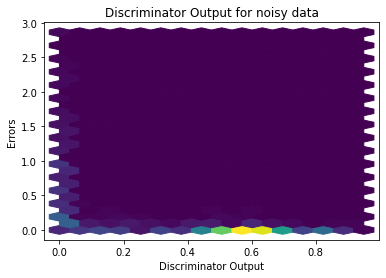

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


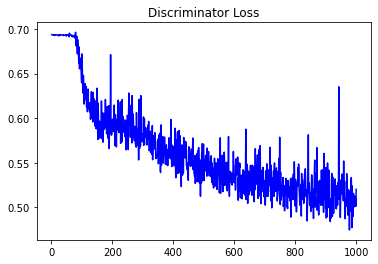

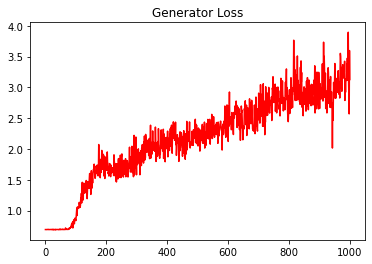

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.09840740656649524


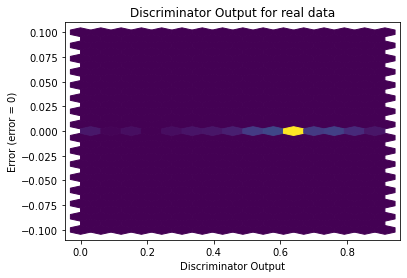

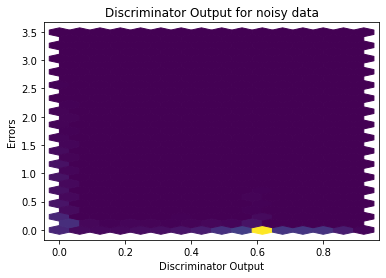

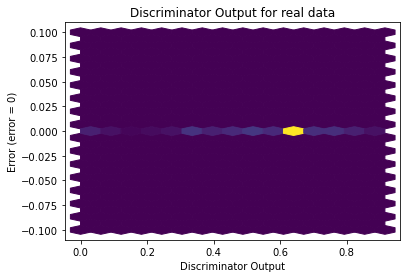

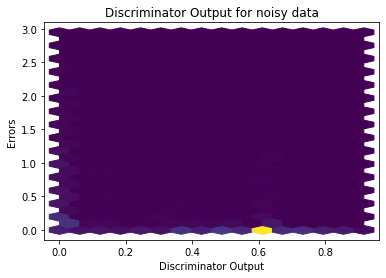

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


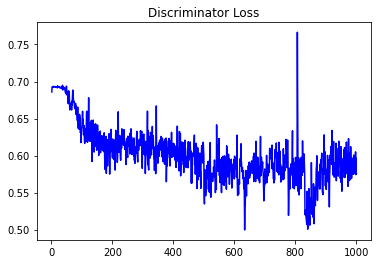

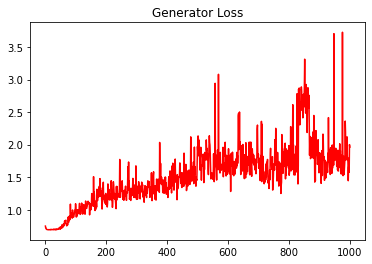

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.10950521993148443


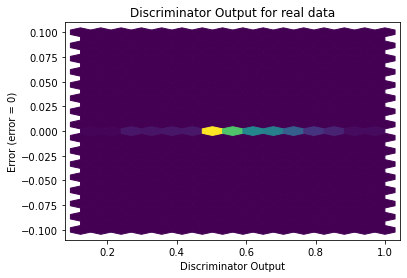

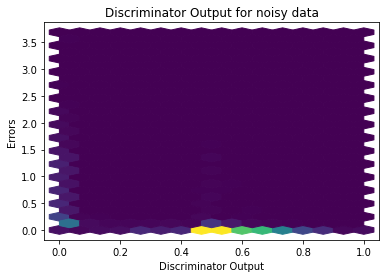

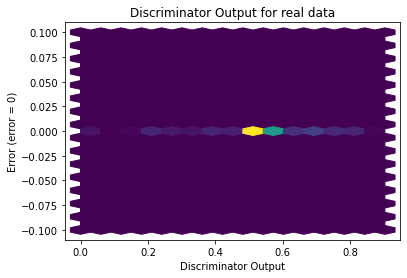

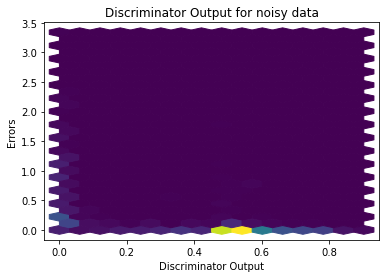

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1251]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4950]], requires_grad=True)
